In [ ]:
! wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Toys_and_Games_5.json.gz


--2024-03-21 23:24:51--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Toys_and_Games_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42057555 (40M) [application/x-gzip]
Saving to: ‘reviews_Toys_and_Games_5.json.gz.1’

reviews_Toys_and_Ga 100%[===================>]  40.11M  9.97MB/s    in 4.0s    

2024-03-21 23:24:55 (9.97 MB/s) - ‘reviews_Toys_and_Games_5.json.gz.1’ saved [42057555/42057555]



In [ ]:
import urllib.request
url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Toys_and_Games_5.json.gz'
urllib.request.urlretrieve(url, 'reviews_Toys_and_Games_5.json.gz')

('reviews_Toys_and_Games_5.json.gz',
 <http.client.HTTPMessage at 0x78d40d1764d0>)

In [ ]:
import gzip
import json

# Lista para almacenar los datos
data = []

# Abre el archivo JSON comprimido y descomprímelo
with gzip.open('reviews_Toys_and_Games_5.json.gz', 'rt', encoding='utf-8') as f:
    # Lee cada línea del archivo
    for line in f:
        # Carga el contenido de la línea en un diccionario
        item = json.loads(line)
        # Agrega el diccionario a la lista de datos
        data.append(item)

# Ahora puedes trabajar con los datos, que estarán en forma de una lista de diccionarios


In [ ]:
data[0]

{'reviewerID': 'A1VXOAVRGKGEAK',
 'asin': '0439893577',
 'reviewerName': 'Angie',
 'helpful': [0, 0],
 'reviewText': 'I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters.',
 'overall': 5.0,
 'summary': 'Magnetic board',
 'unixReviewTime': 1390953600,
 'reviewTime': '01 29, 2014'}

El alumno descargará el/los corpus que desee (detalle sobre los datos a utilizar en
el siguiente punto) y realizará un análisis exploratorio de los datos.
Este ejercicio deberá contener:
- Cardinalidad del vocabulario
- Distribución de reviews por número de estrellas
- Nº de reviews positivas y negativas
- N-grams más frecuentes
- Nubes de palabras
- Visualización en 2 dimensiones de algunos word embeddings calculados con
Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)
- Conclusiones de la exploración
- Cualquier otra métrica / exploración / cálculo que el alumno considere


In [ ]:
vocabulary = set()

for item in data:
    for value in item.values():
        if isinstance(value, str):
            words = value.split()
            vocabulary.update(words)

vocabulary_cardinality = len(vocabulary)
vocabulary_cardinality

470817

In [ ]:
ranges = {'0-1': 0, '1-2': 0, '2-3': 0, '3-4': 0, '4-5': 0}

for item in data:
    rating = float(item['overall'])
    if 0 <= rating < 1:
        ranges['0-1'] += 1
    elif 1 <= rating < 2:
        ranges['1-2'] += 1
    elif 2 <= rating < 3:
        ranges['2-3'] += 1
    elif 3 <= rating < 4:
        ranges['3-4'] += 1
    elif 4 <= rating <= 5:
        ranges['4-5'] += 1

ranges

{'0-1': 0, '1-2': 4707, '2-3': 6298, '3-4': 16357, '4-5': 140235}

In [ ]:
ranges = {'negativa': 0, 'positiva': 0}

for item in data:
    rating = float(item['overall'])
    if 0 <= rating < 3:
        ranges['negativa'] += 1
    elif 3 <= rating < 5:
        ranges['positiva'] += 1
ranges


{'negativa': 11005, 'positiva': 53802}

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5.0,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4.0,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5.0,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5.0,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4.0,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


In [ ]:
review = df['reviewText']
review.head()

0    I like the item pricing. My granddaughter want...
1    Love the magnet easel... great for moving to d...
2    Both sides are magnetic.  A real plus when you...
3    Bought one a few years ago for my daughter and...
4    I have a stainless steel refrigerator therefor...
Name: reviewText, dtype: object

In [ ]:
import unicodedata
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import unicodedata
from nltk.corpus import stopwords
import pandas as pd

# Definir la función de normalización
def normalizacion(review):
    # Separar la revisión en palabras
    review = review.split()
    # Convertir todas las palabras a minúsculas
    review = [word.lower() for word in review]
    # Quitar espacios en blanco al inicio y al final de la revisión
    review = [word.strip() for word in review]
    # Eliminar las palabras 'pricing' y 'item' del texto (se repiten demasiado y me distorsiona la nube de palabras)
    review = [word for word in review if word not in ['pricing', 'item']]
     # Eliminar letras huecas (necesario para que el ejercicio n gram tenga sentido)
    review = [word for word in review if word not in [',', '.',"'"]]
    # Normalizar caracteres especiales
    review = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in review]
    # Obtener lista de palabras vacías en español
    sw_list = set(stopwords.words('spanish'))
    # Eliminar palabras vacías de la revisión
    review = ' '.join([word for word in review if word not in sw_list])
    # Construir lista de palabras que se repiten demasiado y que no tienen sentido en el dataframe (observadas previamente de un ejercicio de wordcloud)
    out=('pricing','item')
    review =''.join([word for word in review if word not in out])
    return review


# Aplicar la función de normalización a la columna 'reviewText'
df['reviewText_norm'] = df['reviewText'].apply(normalizacion)

# Imprimir el DataFrame con la columna normalizada
df['reviewText_norm'].head()


0    i like the pricing. my granddaughter wanted to...
1    love the magnet easel... great for moving to d...
2    both sides are magnetic. real plus when you're...
3    bought one few years ago for my daughter and s...
4    i have stainless steel refrigerator therefore ...
Name: reviewText_norm, dtype: object

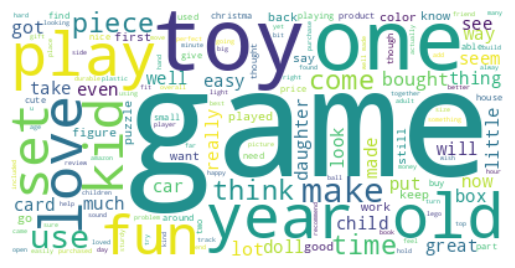

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'review' is your column
text = ' '.join(review for review in df['reviewText_norm'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
from nltk.util import ngrams
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hacemos un n gram de 2 variable. podríamos haberlo hecho de varios, pero nos parecía suficiente hacerlo con dos.

In [ ]:
import nltk
from nltk.util import ngrams
from collections import Counter

# Define the N-gram size
n = 3

# Create a list to store the N-grams
ngram_list = []

# Iterate over each item in the data
for review in df['reviewText_norm']:
    # Tokenize the description into words
    words = nltk.word_tokenize(review)

    # Generate N-grams from the words
    ngrams_list = list(ngrams(words, n))

    # Add the N-grams to the main list
    ngram_list.extend(ngrams_list)

# Count the frequency of each N-gram
ngram_freq = Counter(ngram_list)

# Sort the N-grams by frequency in descending order
sorted_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most frequent N-grams
for ngram, freq in sorted_ngrams[:10]:
    print('N-gram:', ' '.join(ngram), 'Frequency:', freq)


N-gram: . i Frequency: 90282
N-gram: . the Frequency: 84285
N-gram: , and Frequency: 78181
N-gram: of the Frequency: 72250
N-gram: . it Frequency: 69127
N-gram: , but Frequency: 68591
N-gram: it 's Frequency: 56722
N-gram: it is Frequency: 47766
N-gram: in the Frequency: 45616
N-gram: it . Frequency: 38785


In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Train a Word2Vec model
model = Word2Vec(df['reviewText_norm'], min_count=1)

# Choose your words
words = ['game', 'toy', 'play', 'love']

# Find the most similar words
similar_words = {word: [item[0] for item in model.wv.most_similar([word], topn=10)] for word in words}

# Add the chosen words to the similar words
for word in words:
    similar_words[word].append(word)

# Get the vectors for the similar words
vectors = {word: model.wv[word] for word in similar_words for word in similar_words[word]}

# Perform PCA
pca = PCA(n_components=2)
result = pca.fit_transform(list(vectors.values()))

# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(vectors.keys()):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

KeyError: "Key 'fun' not present in vocabulary"